In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage.color import rgb2gray
np.set_printoptions(threshold=np.nan)

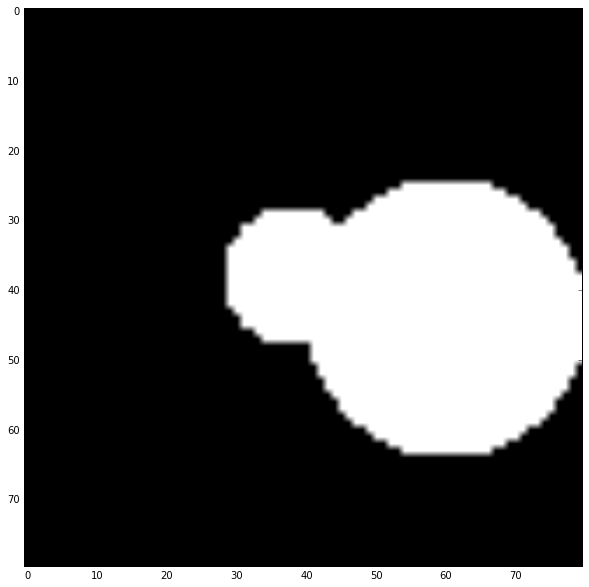

In [2]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 38, 38, 44, 60
x3, y3 = 55, 20
r1, r2, r3 = 10, 20, 15
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
# image = cv2.imread('/Users/shashwat/workspace/dopencv/images/set3/a_70.jpg')
# image_gray = cv2.imread('/Users/shashwat/workspace/dopencv/images/set3/a_70.jpg', 0)
image_gray = rgb2gray(image)
#ret, image_gray = cv2.threshold(image_gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(image, cmap='gray')

In [5]:
#kernel = np.ones((3,3), np.uint8)
#opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)

#plt.imshow(opening, cmap='gray')

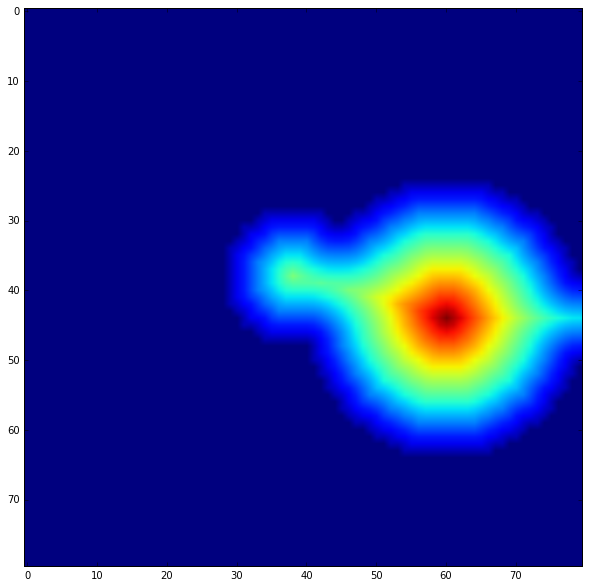

In [6]:
dist = ndi.distance_transform_edt(image_gray)
plt.imshow(dist)

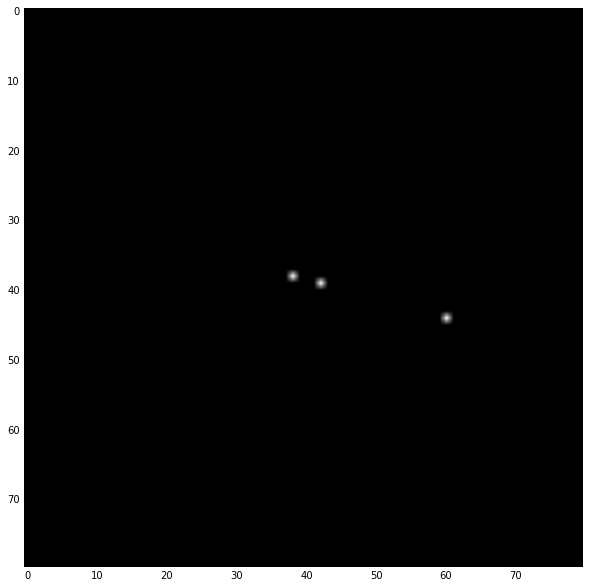

In [7]:
peaks = peak_local_max(dist, indices=False)
plt.imshow(peaks, cmap='gray')

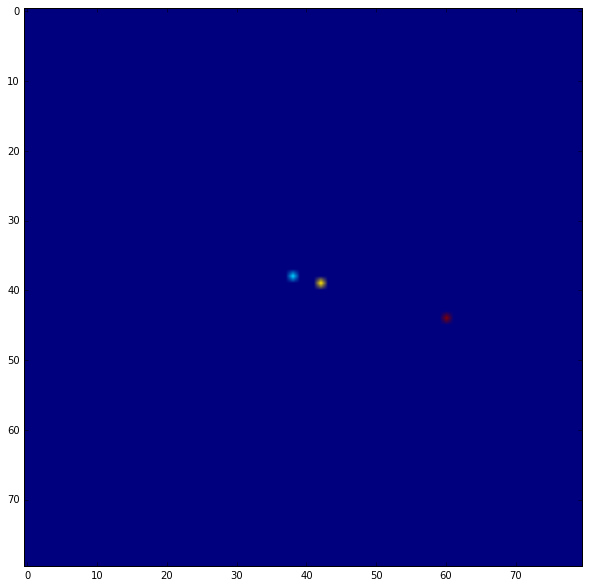

In [8]:
markers = ndi.label(peaks)[0]
plt.imshow(markers)

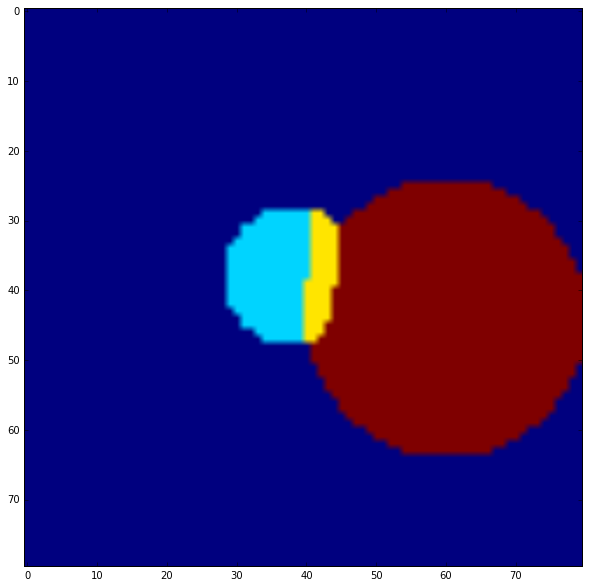

In [9]:
wm = watershed(-dist, markers=markers, mask=image_gray)
plt.imshow(wm)

In [ ]:
from skimage.measure import regionprops
regions = regionprops(wm)

In [ ]:
import math

circularities = []
areas = []

for region in regions:
    circularity = 4*math.pi*region.area/region.perimeter**2
    area = region.area
    if circularity < 0.5 or area <15:
        continue
    circularities.append(circularity)
    areas.append(area)                                     

circularities

In [ ]:
print len(filter(lambda x: x>0.6, circularities))

In [ ]:
gray = cv2.imread('/Users/shashwat/workspace/dopencv/images/set3/a_70.jpg', 0)
ret, image_b = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

In [ ]:
plt.imshow(image_b, cmap='gray')

In [ ]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(image_b, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(opening, cmap='gray')